In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('btc_data.csv')
df.head()

,Date,priceUSD,transactions,size,sentbyaddress,difficulty,hashrate,mining_profitability,sentinusdUSD,transactionfeesUSD,...,price3rsiUSD,price7rsiUSD,price14rsiUSD,price30rsiUSD,price90rsiUSD,price3rocUSD,price7rocUSD,price14rocUSD,price30rocUSD,price90rocUSD
0,2010/07/17,0.0495,235,649.653,390,181.543,2.775561e+09,154298.0,1193.0,0.000010,...,0.000,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0
1,2010/07/18,0.0726,248,765.285,424,181.543,1.554461e+09,401834.0,2620.0,0.000243,...,0.000,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0
2,2010/07/19,0.0859,354,756.040,553,181.543,1.551287e+09,481473.0,4048.0,0.000022,...,0.000,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0
3,2010/07/20,0.0783,413,984.707,632,181.543,1.640430e+09,431831.0,2341.0,0.000000,...,82.751,0.0,0.0,0.0,0.0,58.099,0.0,0.0,0.0,0.0
4,2010/07/21,0.0767,256,542.483,440,181.543,1.723493e+09,460783.0,2122.0,0.000000,...,78.603,0.0,0.0,0.0,0.0,5.652,0.0,0.0,0.0,0.0


In [3]:
df_new=df.iloc[:,1:]

In [4]:
df_new.head(5)

,priceUSD,transactions,size,sentbyaddress,difficulty,hashrate,mining_profitability,sentinusdUSD,transactionfeesUSD,median_transaction_feeUSD,...,price3rsiUSD,price7rsiUSD,price14rsiUSD,price30rsiUSD,price90rsiUSD,price3rocUSD,price7rocUSD,price14rocUSD,price30rocUSD,price90rocUSD
0,0.0495,235,649.653,390,181.543,2.775561e+09,154298.0,1193.0,0.000010,0.0,...,0.000,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0
1,0.0726,248,765.285,424,181.543,1.554461e+09,401834.0,2620.0,0.000243,0.0,...,0.000,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0
2,0.0859,354,756.040,553,181.543,1.551287e+09,481473.0,4048.0,0.000022,0.0,...,0.000,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0
3,0.0783,413,984.707,632,181.543,1.640430e+09,431831.0,2341.0,0.000000,0.0,...,82.751,0.0,0.0,0.0,0.0,58.099,0.0,0.0,0.0,0.0
4,0.0767,256,542.483,440,181.543,1.723493e+09,460783.0,2122.0,0.000000,0.0,...,78.603,0.0,0.0,0.0,0.0,5.652,0.0,0.0,0.0,0.0


### Dropping the priceUSD column and storing it in 'y'

In [5]:
df1=df_new.reset_index(drop=True)
n=df1.drop('priceUSD',1)


C:\Users\KIIT\AppData\Local\Temp\ipykernel_10408\646315669.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  n=df1.drop('priceUSD',1)


In [6]:
y=df1[['priceUSD']]
y

,priceUSD
0,0.0495
1,0.0726
2,0.0859
3,0.0783
4,0.0767
...,...
3483,9349.0000
3484,9394.0000
3485,9366.0000
3486,9393.0000


### Reading the YeoJohnson Autoencoder dataset

In [7]:
minmaxPCA=pd.read_csv('PCA_YeoJohnson_data1.csv')
#Adding the y column to this dataset
combined_data=minmaxPCA.assign(priceUSD=y)
combined_data.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,89,90,91,92,93,94,95,96,97,priceUSD
0,0,32.837640,3.132764,18.739693,-20.866008,0.372720,-11.044245,16.524812,0.166351,-8.700498,...,1.923946,3.832444,-2.257067,2.835188,-0.372358,-2.096878,-1.698082,-1.425736,-0.033201,0.0495
1,1,32.698404,1.773636,15.820019,-18.043860,5.153551,-13.023228,17.966608,-0.569542,-9.306701,...,1.593726,0.604879,0.335266,1.183815,-0.294895,-1.473127,-0.657472,0.007406,-2.294048,0.0726
2,2,33.090879,0.464927,16.262612,-15.361686,6.718747,-15.603086,16.543319,0.781871,-8.695417,...,0.497217,-0.891250,2.450366,2.249480,-1.947763,-2.079104,1.532892,1.893578,-0.800749,0.0859
3,3,32.781217,1.794096,11.529916,-13.659240,5.869486,-9.849079,17.856147,1.884261,-6.869309,...,-0.687552,-0.829605,-5.461876,0.345240,-0.446096,-0.270433,6.035264,4.706512,-1.654442,0.0783
4,4,32.896643,-0.166702,15.860615,-14.031376,0.153960,-11.811843,16.420547,3.158366,-8.634797,...,-0.422376,1.025973,1.077336,0.491024,0.339590,-0.503155,3.711262,1.314670,-0.031391,0.0767


### Dropping the first unnamed column

In [8]:
finaldata = combined_data.iloc[: , 1:]
finaldata

,0,1,2,3,4,5,6,7,8,9,...,89,90,91,92,93,94,95,96,97,priceUSD
0,32.837640,3.132764,18.739693,-20.866008,0.372720,-11.044245,16.524812,0.166351,-8.700498,10.438027,...,1.923946,3.832444,-2.257067,2.835188,-0.372358,-2.096878,-1.698082,-1.425736,-0.033201,0.0495
1,32.698404,1.773636,15.820019,-18.043860,5.153551,-13.023228,17.966608,-0.569542,-9.306701,9.018383,...,1.593726,0.604879,0.335266,1.183815,-0.294895,-1.473127,-0.657472,0.007406,-2.294048,0.0726
2,33.090879,0.464927,16.262612,-15.361686,6.718747,-15.603086,16.543319,0.781871,-8.695417,8.221800,...,0.497217,-0.891250,2.450366,2.249480,-1.947763,-2.079104,1.532892,1.893578,-0.800749,0.0859
3,32.781217,1.794096,11.529916,-13.659240,5.869486,-9.849079,17.856147,1.884261,-6.869309,6.376521,...,-0.687552,-0.829605,-5.461876,0.345240,-0.446096,-0.270433,6.035264,4.706512,-1.654442,0.0783
4,32.896643,-0.166702,15.860615,-14.031376,0.153960,-11.811843,16.420547,3.158366,-8.634797,5.447760,...,-0.422376,1.025973,1.077336,0.491024,0.339590,-0.503155,3.711262,1.314670,-0.031391,0.0767
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3483,-19.315494,0.236167,-2.750750,-5.370912,-0.186745,4.678685,1.096600,3.019217,2.146403,3.662000,...,-0.429743,1.624900,1.085748,-0.379536,-0.537552,-0.248166,-0.836404,1.001076,0.001219,9349.0000
3484,-19.318940,0.733044,-0.889637,-5.979197,-1.170327,4.752099,-1.059497,4.918116,1.074642,2.816077,...,-0.004836,-0.073998,-0.315707,1.726772,0.086268,-0.590934,-1.087419,0.384172,0.323270,9394.0000
3485,-19.018647,0.730092,-4.161934,-3.696162,2.779836,1.157445,-1.148338,4.904417,-0.041506,3.601954,...,-0.613840,-0.938060,0.686956,2.921627,1.419180,-0.648111,-1.180782,-0.634334,0.133916,9366.0000
3486,-19.091961,-1.767811,0.812909,-4.477929,-1.827579,-0.380548,-2.042414,3.578432,-0.707056,4.743335,...,0.276470,-0.493735,0.480427,1.565258,-0.317555,-1.248186,-0.791837,-0.580324,0.377241,9393.0000


In [9]:
X = finaldata.iloc[:, :-1].values
y = finaldata.iloc[:, -1].values


### Splitting the dataset into the Training set and Test set

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


### Training the Linear Regression model on the Training set

In [11]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

### Printing R2 score

In [12]:
r_squared = regressor.score(X, y)
print(r_squared)

0.9412327462108896


In [13]:
y_pred = regressor.predict(X_test)

### Displaying adjusted R2

In [14]:
1 - (1-regressor.score(X, y))*(len(y)-1)/(len(y)-X.shape[1]-1)

0.9395333685563211

### Accuracy on linear regression

In [15]:
regressor.score(X_train,y_train)
pred=regressor.predict(X_test)
regressor.score(X_test,y_test)

0.9402823354757119

### Defining model

### Training the Kernel SVM model on the Training set

In [16]:
from sklearn import preprocessing
from sklearn import utils
lab_enc = preprocessing.LabelEncoder()
training_scores_encoded = lab_enc.fit_transform(y_train)
print(training_scores_encoded)
print(utils.multiclass.type_of_target(y_train))
print(utils.multiclass.type_of_target(y_train.astype('int')))
print(utils.multiclass.type_of_target(training_scores_encoded))

[1767 2058  985 ... 1049 2116 2661]
continuous
multiclass
multiclass


### Applying grid search to find best model and the best parameters

from sklearn.model_selection import GridSearchCV
parameters = [{'C': [0.25, 0.5, 0.75, 1], 'kernel': ['linear']},
              {'C': [0.25, 0.5, 0.75, 1], 'kernel': ['rbf'], 'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}]
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'poly', 'sigmoid']}

In [ ]:
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=2)
grid.fit(X_train,y_train)

### Visualising the Training set results

### Visualising the Test set results

### Gradient boosting Model and its parameter

In [18]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
GBR = GradientBoostingRegressor()
parameters = {'learning_rate': [0.01,0.02,0.03,0.04],
                  'subsample'    : [0.9, 0.5, 0.2, 0.1],
                  'n_estimators' : [100,500,1000, 1500],
                  'max_depth'    : [4,6,8,10]
                 }

In [19]:
grid_GBR = GridSearchCV(estimator=GBR, param_grid = parameters, cv = 2, n_jobs=-1)
grid_GBR.fit(X_train, y_train)

GridSearchCV(cv=2, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.02, 0.03, 0.04],
                         'max_depth': [4, 6, 8, 10],
                         'n_estimators': [100, 500, 1000, 1500],
                         'subsample': [0.9, 0.5, 0.2, 0.1]})

In [20]:
print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",grid_GBR.best_estimator_)
print("\n The best score across ALL searched params:\n",grid_GBR.best_score_)
print("\n The best parameters across ALL searched params:\n",grid_GBR.best_params_)


 Results from Grid Search 

 The best estimator across ALL searched params:
 GradientBoostingRegressor(learning_rate=0.02, max_depth=6, n_estimators=1000,
                          subsample=0.2)

 The best score across ALL searched params:
 0.9829477780164713

 The best parameters across ALL searched params:
 {'learning_rate': 0.02, 'max_depth': 6, 'n_estimators': 1000, 'subsample': 0.2}


### Training the Random forest regression model on the whole dataset

In [21]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(X, y)

RandomForestRegressor(n_estimators=10, random_state=0)

### Randomforest regressor using GridSearchCV 

In [22]:
from sklearn.metrics import r2_score
def Grid_Search_CV_RFR(X_train, y_train):
    from sklearn.model_selection import GridSearchCV
    from sklearn.model_selection import ShuffleSplit
    from sklearn.ensemble import RandomForestRegressor
    

    estimator = RandomForestRegressor()
    param_grid = { 
            "n_estimators"      : [10,20,30],
            "max_features"      : ["auto", "sqrt", "log2"],
            "min_samples_split" : [2,4,8],
            "bootstrap": [True, False],
            }

    grid = GridSearchCV(estimator, param_grid, n_jobs=-1, cv=5)

    grid.fit(X_train, y_train)

    return grid.best_score_ , grid.best_params_

def RFR(X_train, X_test, y_train, y_test, best_params):
    from sklearn.ensemble import RandomForestRegressor
    estimator = RandomForestRegressor(n_jobs=-1).set_params(**best_params)
    estimator.fit(X_train,y_train)
    y_predict = estimator.predict(X_test)
    print ("R2 score:",r2_score(y_test,y_predict))
    return y_test,y_predict

In [23]:
for i in range(5):
    print ("Loop: " , i)
    print ("--------------")
    best_score, best_params = Grid_Search_CV_RFR(X_train, y_train)
    y_test , y_predict = RFR(X_train, X_test, y_train, y_test, best_params)
    print ("Best Score:" ,best_score)
    print ("Best params:",best_params)

Loop:  0
--------------


C:\Users\KIIT\anaconda3\envs\test\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\KIIT\anaconda3\envs\test\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


R2 score: 0.9774487991332323
Best Score: 0.9746891344246921
Best params: {'bootstrap': True, 'max_features': 'auto', 'min_samples_split': 2, 'n_estimators': 20}
Loop:  1
--------------


C:\Users\KIIT\anaconda3\envs\test\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\KIIT\anaconda3\envs\test\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


R2 score: 0.9794277332665254
Best Score: 0.9751707177098657
Best params: {'bootstrap': True, 'max_features': 'auto', 'min_samples_split': 2, 'n_estimators': 30}
Loop:  2
--------------


C:\Users\KIIT\anaconda3\envs\test\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\KIIT\anaconda3\envs\test\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


R2 score: 0.9799071374631807
Best Score: 0.9753944505948476
Best params: {'bootstrap': True, 'max_features': 'auto', 'min_samples_split': 2, 'n_estimators': 30}
Loop:  3
--------------


C:\Users\KIIT\anaconda3\envs\test\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\KIIT\anaconda3\envs\test\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


R2 score: 0.9755858928463131
Best Score: 0.9757027777663847
Best params: {'bootstrap': True, 'max_features': 'auto', 'min_samples_split': 4, 'n_estimators': 20}
Loop:  4
--------------


C:\Users\KIIT\anaconda3\envs\test\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\KIIT\anaconda3\envs\test\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


R2 score: 0.9789299072076919
Best Score: 0.9751712087118826
Best params: {'bootstrap': True, 'max_features': 'auto', 'min_samples_split': 4, 'n_estimators': 20}


### Building the model

In [11]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU
from tensorflow.keras.layers import Dropout

In [12]:
classifier = Sequential()
classifier.add(Dense(units=735,kernel_initializer='he_normal',activation='relu'))
Dropout(0.2)
classifier.add(Dense(units=32,kernel_initializer='normal',activation='relu',kernel_regularizer = 'l1'))
Dropout(0.2)
classifier.add(Dense(units=8,kernel_initializer='normal',activation='relu'))
classifier.add(Dense(units=8,kernel_initializer='normal',activation='relu'))
#Adding the output layer
classifier.add(Dense(1,kernel_initializer='normal',activation='linear'))

In [13]:
classifier.compile(optimizer='adam',loss='mean_absolute_error',metrics=['mean_absolute_error'])

In [14]:
model_history=classifier.fit(X_train,y_train,validation_split=0.2,batch_size=16,epochs=100)

Epoch 1/100
140/140 [==============================] - 1s 5ms/step - loss: 1925.0907 - mean_absolute_error: 1916.3882 - val_loss: 1051.0133 - val_mean_absolute_error: 1028.6763
Epoch 2/100
140/140 [==============================] - 0s 3ms/step - loss: 555.2269 - mean_absolute_error: 530.3229 - val_loss: 392.2671 - val_mean_absolute_error: 366.8821
Epoch 3/100
140/140 [==============================] - 0s 3ms/step - loss: 324.4345 - mean_absolute_error: 298.6511 - val_loss: 316.5970 - val_mean_absolute_error: 290.3983
Epoch 4/100
140/140 [==============================] - 0s 3ms/step - loss: 268.1576 - mean_absolute_error: 241.7326 - val_loss: 277.6089 - val_mean_absolute_error: 250.8374
Epoch 5/100
140/140 [==============================] - 0s 3ms/step - loss: 231.6049 - mean_absolute_error: 204.5079 - val_loss: 246.8540 - val_mean_absolute_error: 219.2948
Epoch 6/100
140/140 [==============================] - 0s 3ms/step - loss: 195.6277 - mean_absolute_error: 167.7855 - val_loss: 225

Epoch 49/100
140/140 [==============================] - 0s 2ms/step - loss: 59.2943 - mean_absolute_error: 38.8326 - val_loss: 114.2298 - val_mean_absolute_error: 93.9946
Epoch 50/100
140/140 [==============================] - 0s 2ms/step - loss: 59.3413 - mean_absolute_error: 39.0467 - val_loss: 105.8211 - val_mean_absolute_error: 85.5814
Epoch 51/100
140/140 [==============================] - 0s 3ms/step - loss: 62.0042 - mean_absolute_error: 41.8470 - val_loss: 101.5672 - val_mean_absolute_error: 81.4372
Epoch 52/100
140/140 [==============================] - 0s 3ms/step - loss: 56.7756 - mean_absolute_error: 36.7660 - val_loss: 104.1582 - val_mean_absolute_error: 84.3008
Epoch 53/100
140/140 [==============================] - 0s 3ms/step - loss: 56.0071 - mean_absolute_error: 36.1503 - val_loss: 106.9575 - val_mean_absolute_error: 87.1069
Epoch 54/100
140/140 [==============================] - 0s 3ms/step - loss: 55.4458 - mean_absolute_error: 35.7074 - val_loss: 102.6028 - val_mea

140/140 [==============================] - 0s 3ms/step - loss: 41.0007 - mean_absolute_error: 26.0171 - val_loss: 91.0001 - val_mean_absolute_error: 76.0867
Epoch 98/100
140/140 [==============================] - 0s 3ms/step - loss: 43.5161 - mean_absolute_error: 28.6076 - val_loss: 95.7349 - val_mean_absolute_error: 80.8534
Epoch 99/100
140/140 [==============================] - 0s 3ms/step - loss: 53.9156 - mean_absolute_error: 39.1200 - val_loss: 92.3581 - val_mean_absolute_error: 77.6205
Epoch 100/100
140/140 [==============================] - 0s 3ms/step - loss: 42.9828 - mean_absolute_error: 28.2353 - val_loss: 87.0560 - val_mean_absolute_error: 72.3096


In [15]:
train_mse = classifier.evaluate(X_train, y_train, verbose=0)
test_mse = classifier.evaluate(X_test, y_test, verbose=0)

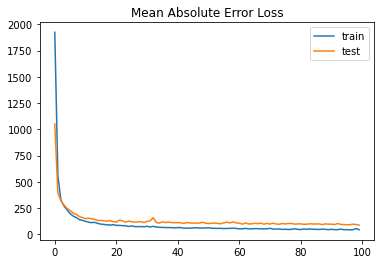

In [16]:
import matplotlib.pyplot as plt
plt.title('Mean Absolute Error Loss')
plt.plot(model_history.history['loss'], label='train')
plt.plot(model_history.history['val_loss'], label='test')
plt.legend()
plt.show()